In [ ]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use file upload function
from google.colab import files
uploaded = files.upload()


# Load the dataset
emails_df = pd.read_csv("emails.csv")

# Display the first few rows of the dataset
emails_df.head()


Saving emails.csv to emails.csv


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Data Preparation
# Separate features and target
X = emails_df.drop(columns=['Email No.', 'Prediction'])  # Drop 'Email No.' and target column
y = emails_df['Prediction']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model Training - Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [ ]:
# Model Evaluation
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

In [ ]:
# Display results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"Precision: {precision_logistic:.4f}")
print(f"Recall: {recall_logistic:.4f}")
print(f"F1 Score: {f1_logistic:.4f}")

Logistic Regression Model Performance:
Accuracy: 0.9652
Precision: 0.9037
Recall: 0.9831
F1 Score: 0.9417


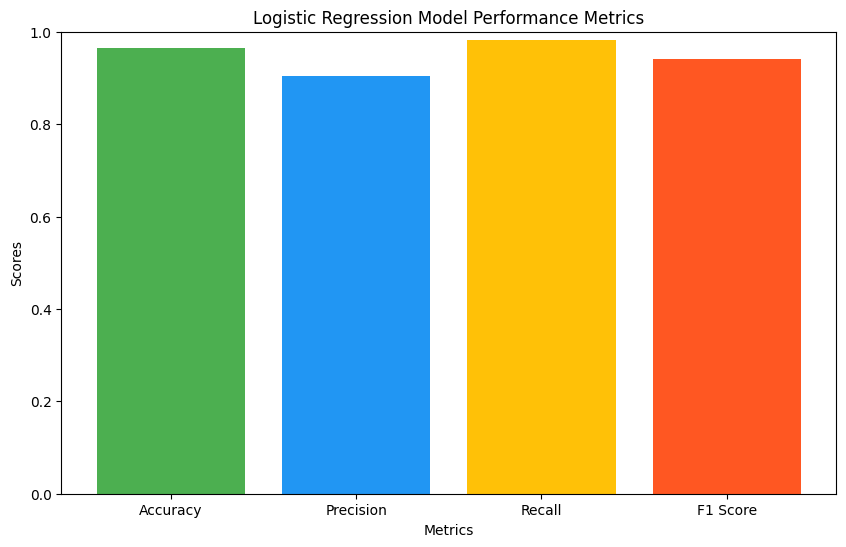

In [ ]:
import matplotlib.pyplot as plt

# Performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])
plt.ylim(0, 1)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Performance Metrics')
plt.show()


Hyperparameter Tuning of ML Models

Implementation Using GridSearchCV and RandomizedSearchCV

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use file upload function
from google.colab import files
uploaded = files.upload()

# Load the dataset
emails_df = pd.read_csv("emails.csv")


Saving emails.csv to emails.csv


In [ ]:
# Data Preparation
X = emails_df.drop(columns=['Email No.', 'Prediction'])
y = emails_df['Prediction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Define hyperparameter grids
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization strength
    'solver': ['liblinear', 'saga'], # Solver types
    'max_iter': [100, 200, 500]     # Max iterations
}

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(logistic_model, param_grid, cv=2, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and train the model with them
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)

# Random Search for hyperparameter tuning
param_dist = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

random_search = RandomizedSearchCV(logistic_model, param_dist, n_iter=10, cv=2, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and train the model with them
best_random_model = random_search.best_estimator_
y_pred_random = best_random_model.predict(X_test_scaled)

In [ ]:
# Evaluate Grid Search Model
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)

# Evaluate Random Search Model
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random)
recall_random = recall_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)


In [ ]:

# Display results
print("Grid Search Model Performance:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_grid:.4f}, Precision: {precision_grid:.4f}, Recall: {recall_grid:.4f}, F1 Score: {f1_grid:.4f}")

print("\nRandom Search Model Performance:")
print(f"Best Parameters: {random_search.best_params_}")
print(f"Accuracy: {accuracy_random:.4f}, Precision: {precision_random:.4f}, Recall: {recall_random:.4f}, F1 Score: {f1_random:.4f}")
